In [291]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-dataset/depression_data.csv


# **1. Veri setinin hazirlanmasi**

# 1.1. Gerekli kutuphaneleri yukleme

In [292]:
import numpy as np    #Sayısal hesaplamalar ve veri manipülasyonu için kullanılır.
                      #Diziler ve çok boyutlu dizilerle çalışmayı kolaylaştırır.
                      #Hızlı ve verimli vektör operasyonları ve çeşitli matematiksel fonksiyonlar sağlar.

import pandas as pd   #Veri okuma, temizleme, analiz etme ve işleme için kullanılır.

import os             #Dosya ve dizin işlemlerini yapabilmek için kullanılır.
                      #Dosyaların bulunduğu dizini değiştirme veya mevcut dosyaları listeleme vb.
                      #Sistemle etkileşime geçip dosya yollarını yönetmenizi sağlar.

import seaborn as sns #İstatistiksel veri görselleştirmeleri yapar. Matplotlib üzerine kuruludur.
                      #Gelişmiş ve estetik grafikleri oluşturmanızı sağlar.
                      #Veri dağılımını, ilişkilerini ve kategorik verileri gösteren grafikler oluşturmak için kullanılır.


import matplotlib.pyplot as plt #Temel ve esnek veri görselleştirmeleri yapar.

import plotly.express as px #Etkileşimli ve dinamik grafikler oluşturur. Kullanıcıların grafiklerle etkileşime girmesini sağlayan güçlü bir araçtır.
                            #3D grafikler, coğrafi haritalar ve hareketli grafikler gibi ileri seviye görselleştirmeleri destekler.

# 1.2. Veri setini  yukleme ve kontrol etme

In [293]:
df = pd.read_csv("/kaggle/input/depression-dataset/depression_data.csv")

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [295]:
df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

# 1.3. Degisken aciklamasi 


* Name: The full name of the individual.
* Age: The age of the individual in years
* Marital Status: The marital status of the individual. Possible values include Single, Married, Divorced, and Widowed.
* Education Level: The highest level of education attained by the individual. Possible values include High School, Associate Degree, Bachelor's Degree, Master's Degree, and PhD.
* Number of Children: The number of children the individual has.
* Smoking Status: Indicates whether the individual is a smoker or not. Possible values are Smoker, Former and Non-smoker.
* Physical Activity Level: The level of physical activity undertaken by the individual. Possible values include Sedentary, Moderate, and Active.
* Employment Status: The employment status of the individual. Possible values include Employed and Unemployed.
* Income: The annual income of the individual in USD.
* Alcohol Consumption: The level of alcohol consumption. Possible values include Low, Moderate, and High.
* Dietary Habits: The dietary habits of the individual. Possible values include Healthy, Moderate, and Unhealthy.
* Sleep Patterns: The quality of sleep. Possible values include Good, Fair, and Poor.
* History of Mental Illness: Whether the individual has a history of mental illness. Possible values are Yes and No.
* History of Substance Abuse: Whether the individual has a history of substance abuse. Possible values are Yes and No.
* Family History of Depression: Indicates if there is a family history of depression. Possible values are Yes and No.
* Chronic Medical Conditions: Whether the individual has chronic medical conditions. Possible values are Yes and No.

****************sı**

* **Ad**: Bireyin tam adı.
* **Yaş**: Bireyin yaşı (yıl cinsinden).
* **Medeni Durum**: Bireyin medeni durumu. Olası değerler: Bekar, Evli, Boşanmış, Dul.
* **Eğitim Düzeyi**: Bireyin elde ettiği en yüksek eğitim seviyesi. Olası değerler: Lise, Önlisans, Lisans, Yüksek Lisans, Doktora.
* **Çocuk Sayısı**: Bireyin sahip olduğu çocuk sayısı.
* **Sigara Kullanım Durumu**: Bireyin sigara içip içmediğini belirtir. Olası değerler: Sigaraden İçen, Eski Sigara İçen, Sigara İçmeyen.
* **Fiziksel Aktivite Seviyesi**: Bireyin yaptığı fiziksel aktivite düzeyi. OlasSedenter: Hareketsiz, Orta, Aktif.
* **Çalışma Durumu**: Bireyin çalışma durumu. Olası değerler: Çalışan, Çalışmayan.
* **Gelir**: Bireyin yıllık geliri (USD cinsinden).
* **Alkol Tüketimi**: Bireyin alkol tüketim seviyesi. Olası değerler: Düşük, Orta, Yüksek.
* **Diyet Alışkanlıkları**: Bireyin diyet alışkanlıkları. Olası değerler: Sağlıklı, Orta, Sağlıksız.
* **Uyku Düzeni**: Bireyin uyku kalitesi. Olası değerler: İyi, Orta, Kötü.
* **Zihinsel Hastalık Geçmişi**: Bireyin zihinsel hastalık geçmişi olup olmadığı. Olası değerler: Evet, Hayır.
* **Madde Bağımlılığı Geçmişi**: Bireyin madde bağımlılığı geçmişi olup olmadığı. Olası değerler: Evet, Hayır.
* **Ailede Depresyon Geçmişi**: Bireyin ailesinde depresyon geçmişi olup olmadığını belirtir. Olası değerler: Evet, Hayır.
* **Kronik Tıbbi Durumlar**: Bireyin kronik tıbbi durumu olup olmadığı. Olası dend the dataset variables.

In [296]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


# 1.4. Veri setinde rastgele eksik veriler olusturma

Veri setimizde eksik degerler yok fakat amacimiz gercek dunya ornek veri setlerine yakin bir veri seti uzerinde calismak oldugu icin, veri setimizde eksik degerler olusturuyoruz.

In [297]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

Su an, gercek hayattaki veri setlerine daha yakin olan, eksik degerleri olan bir veri setimiz var. Tum islemler bu veri seti uzerinde yapilacaktir. 

# 2. Eksik veriler

# 2.1. Eksik veri analizi

In [298]:
#yeni veri setimizi gozlemliyoruz
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,NaN,NaN,Poor,No,No,No,No
4,Michael Rich,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          401708 non-null  object 
 1   Age                           401583 non-null  float64
 2   Marital Status                401626 non-null  object 
 3   Education Level               401608 non-null  object 
 4   Number of Children            401611 non-null  float64
 5   Smoking Status                401602 non-null  object 
 6   Physical Activity Level       401465 non-null  object 
 7   Employment Status             401498 non-null  object 
 8   Income                        401516 non-null  float64
 9   Alcohol Consumption           401609 non-null  object 
 10  Dietary Habits                401463 non-null  object 
 11  Sleep Patterns                401619 non-null  object 
 12  History of Mental Illness     401593 non-nul

Turu 'object' olan oznitelikleri 'category'  olarak duzenliyoruz.

In [300]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print(numerical_features)
print(categorical_features)

for col in df.columns:
    if col in categorical_features:
        df[col]=pd.Categorical(df[col])


['Age', 'Number of Children', 'Income']
['Name', 'Marital Status', 'Education Level', 'Smoking Status', 'Physical Activity Level', 'Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions']


Yeni veri setimizde kac tane degerin non-null oldugunu, kac tanesinin de null oldugunu gozlemliyoruz

In [302]:
df.isnull().sum()

Name                            12060
Age                             12185
Marital Status                  12142
Education Level                 12160
Number of Children              12157
Smoking Status                  12166
Physical Activity Level         12303
Employment Status               12270
Income                          12252
Alcohol Consumption             12159
Dietary Habits                  12305
Sleep Patterns                  12149
History of Mental Illness       12175
History of Substance Abuse      12411
Family History of Depression    12421
Chronic Medical Conditions      12381
dtype: int64

In [303]:
df.notnull().sum()

Name                            401708
Age                             401583
Marital Status                  401626
Education Level                 401608
Number of Children              401611
Smoking Status                  401602
Physical Activity Level         401465
Employment Status               401498
Income                          401516
Alcohol Consumption             401609
Dietary Habits                  401463
Sleep Patterns                  401619
History of Mental Illness       401593
History of Substance Abuse      401357
Family History of Depression    401347
Chronic Medical Conditions      401387
dtype: int64

Eksik deger oranlarini hesapliyoruz.

In [304]:
missing_values = df.isnull().sum()

print(missing_values)

print("\n")

# Toplam kayıt sayısını al
total_rows = len(df)

print(total_rows)

print("\n")

# Eksik değer oranını hesapla
missing_percentage = (missing_values / total_rows) * 100

# Sonuçları incele
print(missing_percentage)

Name                            12060
Age                             12185
Marital Status                  12142
Education Level                 12160
Number of Children              12157
Smoking Status                  12166
Physical Activity Level         12303
Employment Status               12270
Income                          12252
Alcohol Consumption             12159
Dietary Habits                  12305
Sleep Patterns                  12149
History of Mental Illness       12175
History of Substance Abuse      12411
Family History of Depression    12421
Chronic Medical Conditions      12381
dtype: int64


413768


Name                            2.914677
Age                             2.944887
Marital Status                  2.934495
Education Level                 2.938845
Number of Children              2.938120
Smoking Status                  2.940295
Physical Activity Level         2.973405
Employment Status               2.965430
Income                          2.961080

In [305]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 6424592 adet eksik olmayan, 195696 eksik gözlem var.


Veri setinde yanlis yazilmis degerler olmasin diye kontrol ediyoruz (ornegin PhD yerine PhDD, veya sayisal degiskenlerde metin degerleri olmasin vb.)

In [306]:
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("-" * 50)


Unique values in 'Name':
['Christine Barker', 'Jacqueline Lewis', 'Shannon Church', 'Charles Jordan', 'Michael Rich', ..., 'Amy Haley', 'Karl Elliott', 'Madeline Butler', 'Travis Brewer', 'Gary Faulkner']
Length: 193112
Categories (193111, object): ['Aaron Aguilar', 'Aaron Aguirre', 'Aaron Alexander', 'Aaron Ali', ..., 'Zoe White', 'Zoe White DDS', 'Zoe Whitehead', 'Zoe Wilson']
--------------------------------------------------
Unique values in 'Age':
[31. 55. 78. 58. 18. 20. 60. 50. 77. 70. 59. 33. 66. 38. 25. 32. 52. 49.
 28. 56. 37. 27. nan 69. 46. 67. 22. 26. 34. 53. 44. 62. 51. 23. 24. 35.
 61. 65. 63. 73. 71. 76. 43. 54. 40. 39. 21. 19. 64. 36. 72. 30. 45. 80.
 41. 48. 42. 68. 75. 57. 47. 79. 74. 29.]
--------------------------------------------------
Unique values in 'Marital Status':
['Married', 'Widowed', 'Divorced', 'Single', NaN]
Categories (4, object): ['Divorced', 'Married', 'Single', 'Widowed']
--------------------------------------------------
Unique values in 'Educatio

Veri setimizde degiskenlerin degerleri istedigimiz gibidir. Simdi eksik verileri gorsellestirelim. 

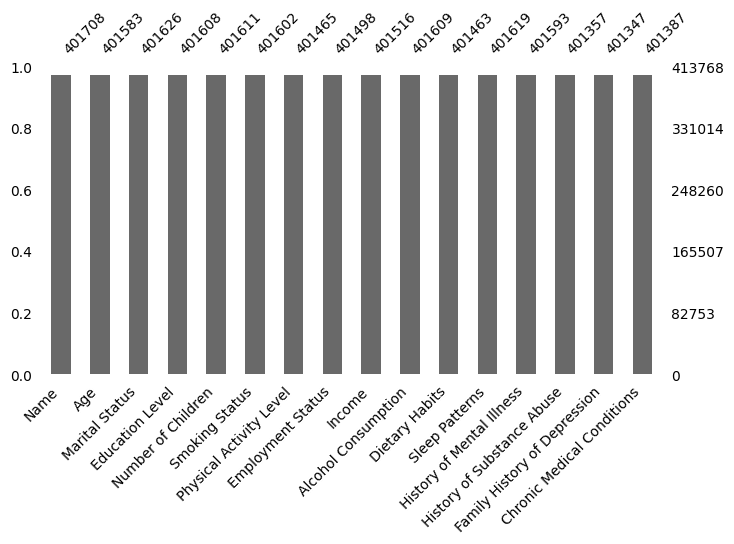

In [307]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

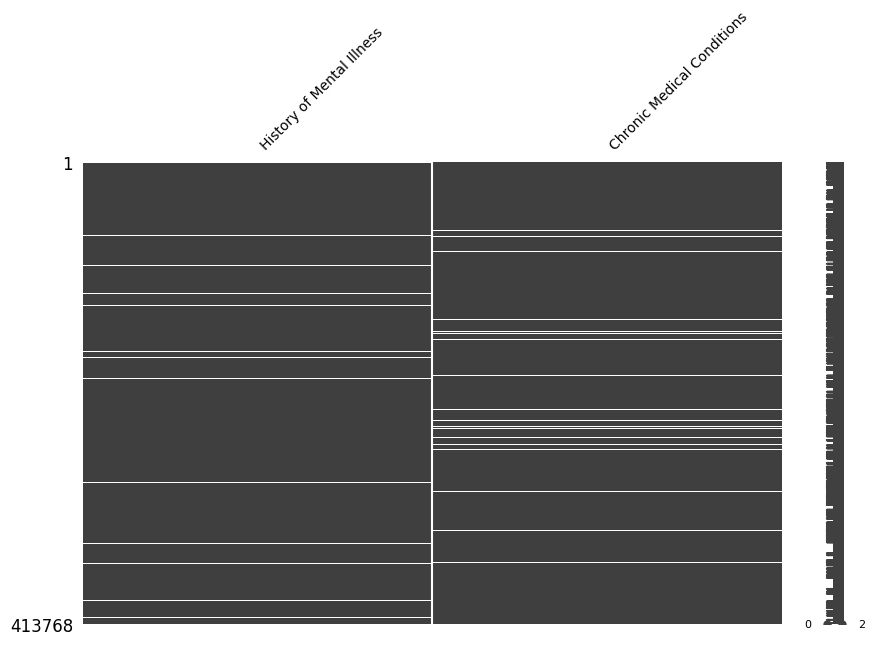

In [308]:
# 2 degiskenin eksik degerler konusunda iliskili olup olmadigina bakiyoruz. Normalde bu iki degiskenin iliskili olmasini bekleriz ama eksik degerleri rastgele oluusturdugumuz icin aralarinda bir baglanti goremiyoruz. Duzenlenmemis bir veri seti uzerinde, gercek durumlarda bu iki degerin ayni anda eksik olmasi daha olasi.
msno.matrix(df = df[['History of Mental Illness', 'Chronic Medical Conditions']],
            figsize = (10, 6),
            fontsize = 10);

# 2.2 Eksik verilerin duzeltimesi

"Eksik bir verinin bulunduğu gözlemi silmeye karar verebilmek için, bu eksikliğin doğal olmayan bir şekilde ortaya çıktığından emin olmamız gerekir. Örneğin elimizdeki bir araç veri setinde elektrikli araçlar için motor hacmi kolonunda Na değer bulunması doğal bir eksikliğe işaret eder. Bu durumda silme işlemi yerine uygun bir şekilde doldurmak tercih edilebilir."
Veri setimizdeki tum eksik degerler, dogal olmayan bir sekilde ortaya cikmistir.
Veri setimizin boyutu cok buyuktur. Eksik degerleri olan kayit sayisi da az oldugu icin, hepsini direk de silebiliriz. Ama daha dogru sonuclar icin, eksik degerleri hem silme, hem de doldurma yontemleri ile duzeltecegiz. 
Oncellikle, 2 den fazla eksik degeri olan tum satirlari siliyoruz. 

In [310]:
# Her bir gözlemdeki (satırdaki) eksik değer sayısını hesapla
missing_counts_per_row = df.isna().sum(axis=1)

# 2'den fazla eksik değere sahip gözlemleri bul
rows_with_more_than_2_missing = df[missing_counts_per_row > 2]

# Sonuçları görüntüle
print(len(rows_with_more_than_2_missing))

4450


In [311]:
# 2'den fazla eksik değere sahip gözlemleri sil
df_cleaned = df[df.isna().sum(axis=1) <= 2]

print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_cleaned.shape}")

Original dataset size: (413768, 16)
Cleaned dataset size: (409318, 16)


Age ozniteligi analizimiz icin cok onemli bir faktor oldugu icin, age degeri eksik olan satirlari silebiliriz. 

In [313]:
df_cleaned = df_cleaned.dropna(subset=["Age"])

<class 'pandas.core.frame.DataFrame'>
Index: 397999 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Name                          387005 non-null  category
 1   Age                           397999 non-null  float64 
 2   Marital Status                386890 non-null  category
 3   Education Level               386951 non-null  category
 4   Number of Children            386975 non-null  float64 
 5   Smoking Status                386950 non-null  category
 6   Physical Activity Level       386829 non-null  category
 7   Employment Status             386841 non-null  category
 8   Income                        386816 non-null  float64 
 9   Alcohol Consumption           386915 non-null  category
 10  Dietary Habits                386785 non-null  category
 11  Sleep Patterns                386951 non-null  category
 12  History of Mental Illness     38690

In [450]:
df_cleaned.isnull().sum()

Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
Family History of Depression    0
Chronic Medical Conditions      0
Age Range                       0
Income Range                    0
dtype: int64

Eksik olan Income degerlerini doldurmak icin Education Level'e gore ortalama gelirlere bakabiliriz :

In [315]:
df_cleaned.groupby("Education Level", observed = False)["Income"].mean().to_frame()

,Income
Education Level,
Associate Degree,37058.211669
Bachelor's Degree,57615.769320
High School,27214.100047
Master's Degree,79421.482931
PhD,104385.015531


In [316]:
df_cleaned["Income"].fillna(value = df_cleaned.groupby("Education Level")["Income"].transform("mean"),
                                       inplace = True)

/tmp/ipykernel_30/264305969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned["Income"].fillna(value = df_cleaned.groupby("Education Level")["Income"].transform("mean"),
/tmp/ipykernel_30/264305969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Income"].fillna(value = df_cleaned.groupby("Education Level")["In

In [317]:
df_cleaned.isnull().sum()

Name                            10994
Age                                 0
Marital Status                  11109
Education Level                 11048
Number of Children              11024
Smoking Status                  11049
Physical Activity Level         11170
Employment Status               11158
Income                            222
Alcohol Consumption             11084
Dietary Habits                  11214
Sleep Patterns                  11048
History of Mental Illness       11090
History of Substance Abuse      11278
Family History of Depression    11306
Chronic Medical Conditions      11305
dtype: int64

Name degiskeni, analizimiz icin onemli bir etken degildir ( cinsiyet degiskeni yok, analizimiz icin iyi olabilirdi ama elimizde name degiskeni mevcut olsa da cinsiyet cikarimi yapamiyoruz). Bu nedenle, Name sutununu komple elimine ediyoruz.

In [318]:
df_cleaned.drop(columns=['Name'], inplace=True)

df_cleaned.isnull().sum()

Age                                 0
Marital Status                  11109
Education Level                 11048
Number of Children              11024
Smoking Status                  11049
Physical Activity Level         11170
Employment Status               11158
Income                            222
Alcohol Consumption             11084
Dietary Habits                  11214
Sleep Patterns                  11048
History of Mental Illness       11090
History of Substance Abuse      11278
Family History of Depression    11306
Chronic Medical Conditions      11305
dtype: int64

Marital status'u eksik olanlar icin oncellikle age gruplarina gore marital status'u gorsellestiriyoruz, sonrasinda her age grubunda mode degerine gore dolduruyoruz.

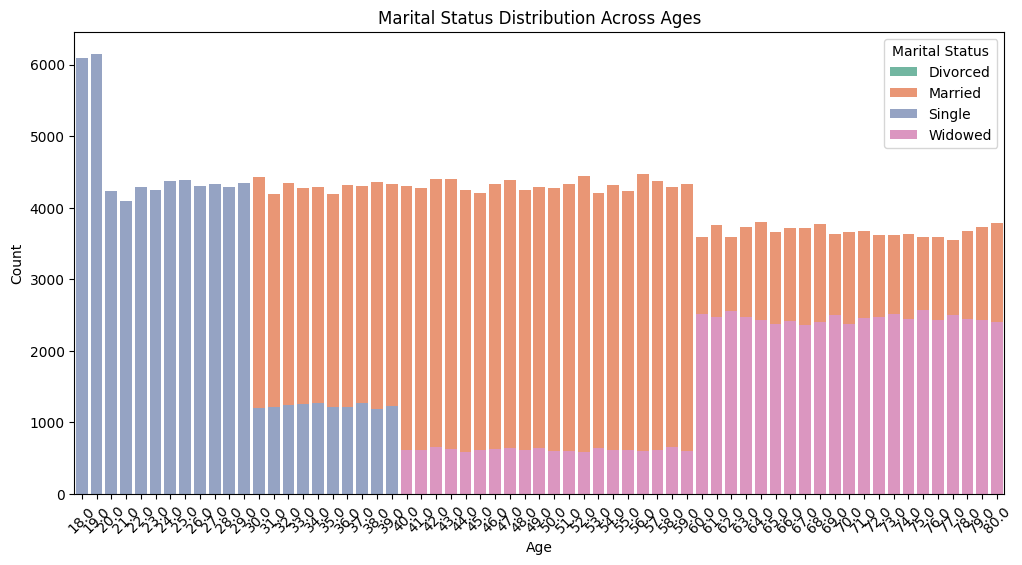

In [319]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Age', hue='Marital Status', palette='Set2', dodge=False)
plt.title('Marital Status Distribution Across Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [320]:

df_cleaned.loc[(df_cleaned['Marital Status'].isna()) & (df_cleaned['Age'] >= 18) & (df_cleaned['Age'] <= 29), 'Marital Status'] = 'Single'
df_cleaned.loc[(df_cleaned['Marital Status'].isna()) & (df_cleaned['Age'] >= 30) & (df_cleaned['Age'] <= 60), 'Marital Status'] = 'Married'
df_cleaned.loc[(df_cleaned['Marital Status'].isna()) & (df_cleaned['Age'] >= 61) & (df_cleaned['Age'] <= 81), 'Marital Status'] = 'Widowed'

df_cleaned.isnull().sum()  


Age                                 0
Marital Status                      0
Education Level                 11048
Number of Children              11024
Smoking Status                  11049
Physical Activity Level         11170
Employment Status               11158
Income                            222
Alcohol Consumption             11084
Dietary Habits                  11214
Sleep Patterns                  11048
History of Mental Illness       11090
History of Substance Abuse      11278
Family History of Depression    11306
Chronic Medical Conditions      11305
dtype: int64

Education level ile age arasinda cok guclu bir iliski var mi diye bakiyoruz. Olmadigi icin, education level sutunu eksik olanlari direk siliyoruz.

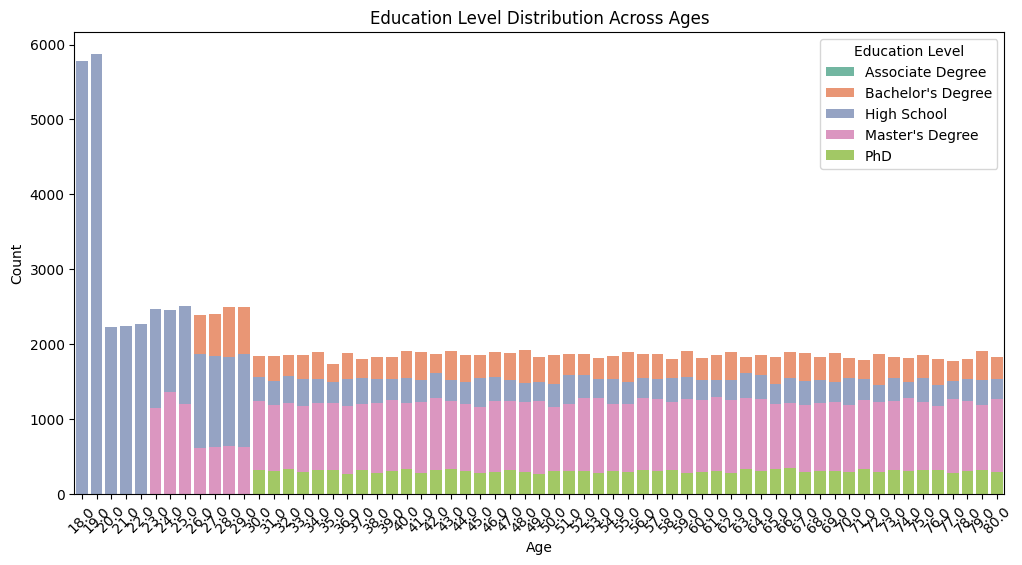

In [321]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Age', hue='Education Level', palette='Set2', dodge=False)
plt.title('Education Level Distribution Across Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.xticks(rotation=45)  
plt.show()

In [323]:
df_cleaned = df_cleaned.dropna(subset=["Education Level"])
df_cleaned.isnull().sum()

Age                                 0
Marital Status                      0
Education Level                     0
Number of Children              10815
Smoking Status                  10838
Physical Activity Level         10921
Employment Status               10936
Income                              0
Alcohol Consumption             10842
Dietary Habits                  11009
Sleep Patterns                  10808
History of Mental Illness       10857
History of Substance Abuse      11032
Family History of Depression    11060
Chronic Medical Conditions      11078
dtype: int64

Number of Children eksik olanlari, Marital Statuse gore dolduruyoruz.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


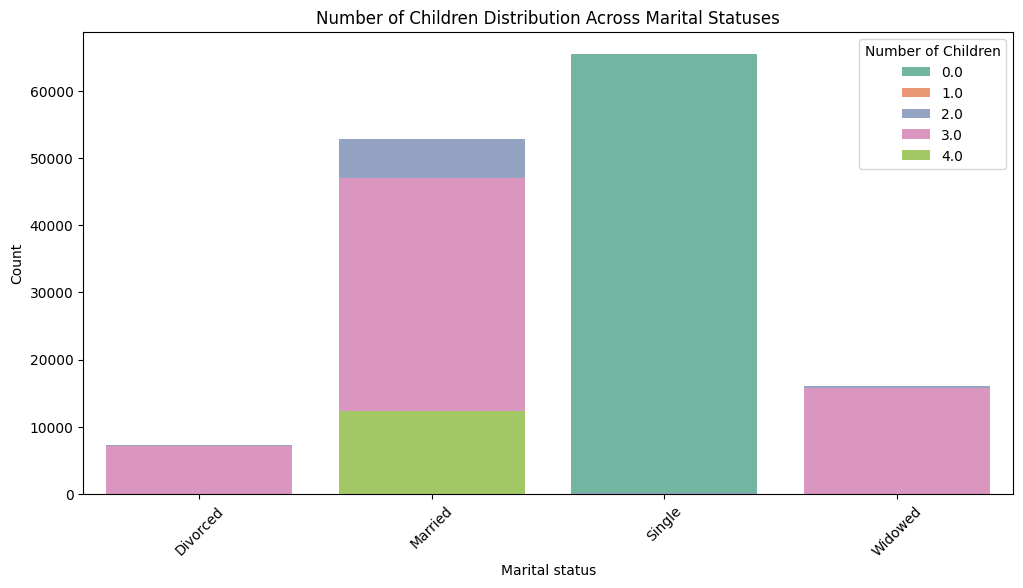

In [324]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Marital Status', hue='Number of Children', palette='Set2', dodge=False)
plt.title('Number of Children Distribution Across Marital Statuses')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.legend(title='Number of Children')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [325]:
df_cleaned["Number of Children"].fillna(value = df_cleaned.groupby("Marital Status")["Number of Children"].transform("mean"),
                                       inplace = True)

df_cleaned.isnull().sum()

/tmp/ipykernel_30/1536699938.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned["Number of Children"].fillna(value = df_cleaned.groupby("Marital Status")["Number of Children"].transform("mean"),
/tmp/ipykernel_30/1536699938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Number of Children"].fillna(value = df_c

Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                  10838
Physical Activity Level         10921
Employment Status               10936
Income                              0
Alcohol Consumption             10842
Dietary Habits                  11009
Sleep Patterns                  10808
History of Mental Illness       10857
History of Substance Abuse      11032
Family History of Depression    11060
Chronic Medical Conditions      11078
dtype: int64

Smoking status icin mode degeri kullaniyoruz. 

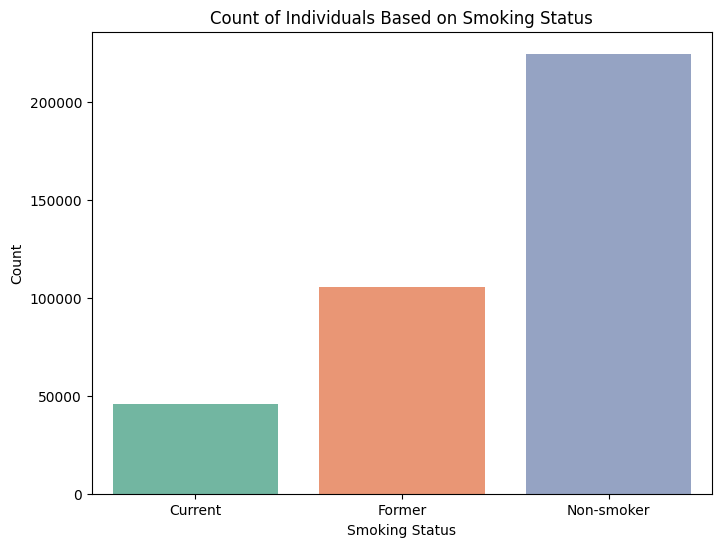

In [326]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking Status', data=df_cleaned, palette='Set2')

# Add labels and title
plt.title('Count of Individuals Based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

In [327]:
smoking_status_mode = df_cleaned['Smoking Status'].mode()

df_cleaned['Smoking Status'] = df_cleaned['Smoking Status'].fillna(value = smoking_status_mode[0])

df_cleaned.isnull().sum()

Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                      0
Physical Activity Level         10921
Employment Status               10936
Income                              0
Alcohol Consumption             10842
Dietary Habits                  11009
Sleep Patterns                  10808
History of Mental Illness       10857
History of Substance Abuse      11032
Family History of Depression    11060
Chronic Medical Conditions      11078
dtype: int64

Employment status'u eksik olanlari, Income'a gore dolduruyoruz.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


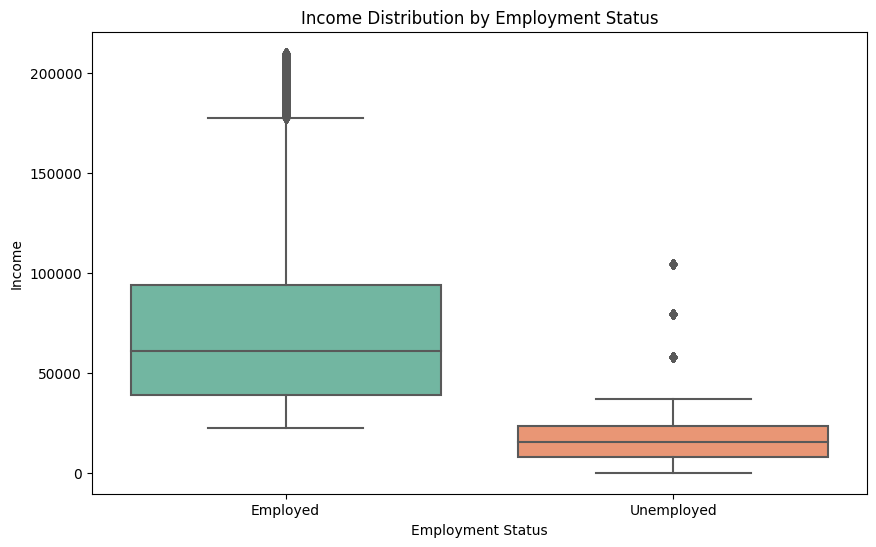

In [328]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment Status', y='Income', data=df_cleaned, palette='Set2')

# Add labels and title
plt.title('Income Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Income')
plt.show()

In [329]:

df_cleaned['Employment Status'] = df_cleaned.apply(
    lambda row: 'Unemployed' if pd.isna(row['Employment Status']) and row['Income'] < 30000 
    else ('Employed' if pd.isna(row['Employment Status']) and row['Income'] >= 30000 
    else row['Employment Status']), axis=1)

# Verify the changes
df_cleaned.isnull().sum()  # Check how many missing values are left


Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                      0
Physical Activity Level         10921
Employment Status                   0
Income                              0
Alcohol Consumption             10842
Dietary Habits                  11009
Sleep Patterns                  10808
History of Mental Illness       10857
History of Substance Abuse      11032
Family History of Depression    11060
Chronic Medical Conditions      11078
dtype: int64

Diger eksik degerleri siliyoruz. 

In [333]:
df_cleaned = df_cleaned.dropna(subset=["Physical Activity Level"])
df_cleaned = df_cleaned.dropna(subset=["Alcohol Consumption"])
df_cleaned = df_cleaned.dropna(subset=["Dietary Habits"])
df_cleaned = df_cleaned.dropna(subset=["Chronic Medical Conditions"])
df_cleaned = df_cleaned.dropna(subset=["Sleep Patterns"])
df_cleaned = df_cleaned.dropna(subset=["Family History of Depression"])
df_cleaned = df_cleaned.dropna(subset=["History of Substance Abuse"])
df_cleaned = df_cleaned.dropna(subset=["History of Mental Illness"])

df_cleaned.isnull().sum()

Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

Veri setimizde su an artik eksik degerler yok. Sayisal degiskenler icin aykiri deger analizi yapiyoruz :

<Axes: xlabel='Income'>

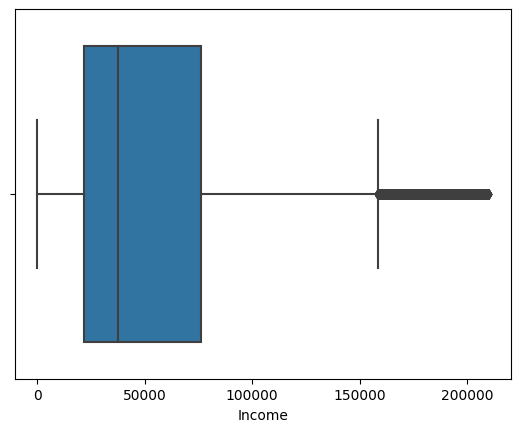

In [334]:
sns.boxplot(x=df_cleaned['Income'])

<Axes: >

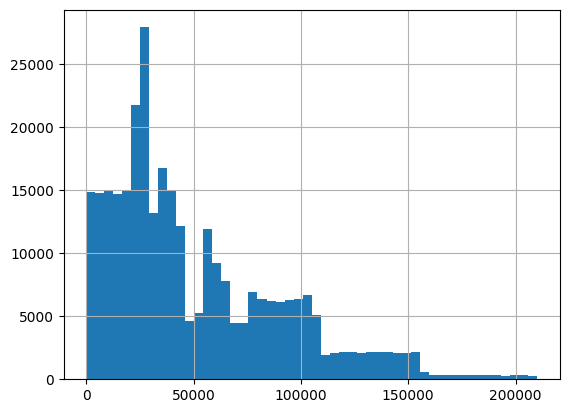

In [335]:
df_cleaned['Income'].hist(bins=50)

Gorebildigimiz gibi, Gelir degiskeni icin aykiri degerlerimiz var ama bunlar anormal bir sekilde olusan degerler degil, gercek degerlerdir bu yuzden bu degerleri elimine etmiyoruz. Eger ornegin eksi degerlerimiz olsaydi, onlari silerdik.

<Axes: xlabel='Age'>

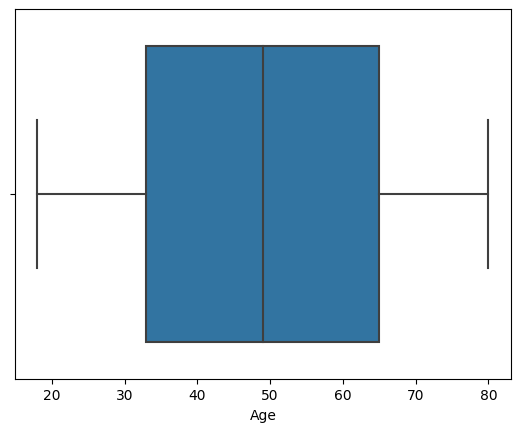

In [336]:
sns.boxplot(x=df_cleaned['Age'])

<Axes: xlabel='Number of Children'>

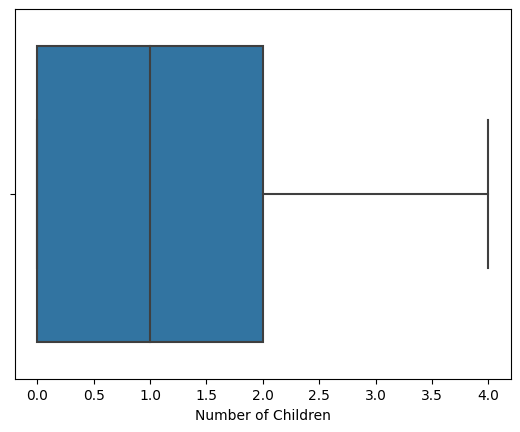

In [337]:
sns.boxplot(x=df_cleaned['Number of Children'])

Age ve Number of Children icin aykiri degerlerimiz bulunmamaktadir. Veri setimiz temzidir. Ama veri analizi kismina gecmeden once, daha detayli bir analiz icin ve veriyi daha iyi anlayabilmemiz icin Feature Engineering uygulayabiliriz.

# 3. Feature Engineering

 Bu kapsamda, Age degiskenini farkli gruplara ayiralim : 

In [338]:
def age_range(age):
    if age <= 29:
        return 'Young Adult'
    elif 30 <= age <= 60 :
        return 'Middle aged'
    else:
        return 'Senior'

df_cleaned['Age Range'] = df_cleaned['Age'].apply(age_range)

df_cleaned.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age Range
0,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,Middle aged
1,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,Middle aged
2,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,Senior
4,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,Young Adult
5,20.0,Single,High School,0.0,Former,Active,Employed,44448.91,Low,Unhealthy,Fair,No,Yes,No,No,Young Adult


Income degiskenini de farkli gruplara ayirabiliriz, ama bunun icn oncellikle Quartiles analizi yapalim : 

In [340]:
df_income=df_cleaned["Income"]

# Quartile değerlerin belirlenmesi.
Q1 = df_income.quantile(0.25)
Q2 = df['Income'].quantile(0.5)
Q3 = df_income.quantile(0.75)

print(Q1)
print(Q2)
print(Q3)

print("-----------------------")

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

print("-----------------------")

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

print(lower_fence)
print(upper_fence)



21617.2725
37529.854999999996
76412.505
-----------------------
54795.232500000006
-----------------------
-60575.576250000006
158605.35375


In [341]:
def income_range(income):
    if income <= Q1:
        return 'Low'
    elif  Q1< income <= Q3 :
        return 'Medium'
    elif Q3 < income <= upper_fence :
        return 'High'
    else:
        return 'Very High'


df_cleaned['Income Range']=df_cleaned["Income"].apply(income_range)

In [342]:
df_cleaned.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age Range,Income Range
0,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,Middle aged,Medium
1,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,Middle aged,Medium
2,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,Senior,High
4,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,Young Adult,Low
5,20.0,Single,High School,0.0,Former,Active,Employed,44448.91,Low,Unhealthy,Fair,No,Yes,No,No,Young Adult,Medium


# 4. Veri Analizi 

Bu kisimda, veriyi anlamaya calisiyoruz, yani amacimiz veriden **BILGI elde etmektir**.

In [344]:
#guncel veri setimizdeki kolonlari gozlemliyoruz
df_cleaned.columns

Index(['Age', 'Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions',
       'Age Range', 'Income Range'],
      dtype='object')

In [347]:
# Kategorik degiskenleri goruntuleyelim
df_cleaned['Age Range']=pd.Categorical(df_cleaned['Age Range'])
df_cleaned['Income Range']=pd.Categorical(df_cleaned['Income Range'])

df_categorical = df_cleaned.select_dtypes(include = "category")

df_categorical.head()

,Marital Status,Education Level,Smoking Status,Physical Activity Level,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age Range,Income Range
0,Married,Bachelor's Degree,Non-smoker,Active,Moderate,Moderate,Fair,Yes,No,Yes,Yes,Middle aged,Medium
1,Married,High School,Non-smoker,Sedentary,High,Unhealthy,Fair,Yes,No,No,Yes,Middle aged,Medium
2,Widowed,Master's Degree,Non-smoker,Sedentary,Low,Unhealthy,Good,No,No,Yes,No,Senior,High
4,Single,High School,Non-smoker,Sedentary,Low,Moderate,Fair,Yes,No,Yes,Yes,Young Adult,Low
5,Single,High School,Former,Active,Low,Unhealthy,Fair,No,Yes,No,No,Young Adult,Medium


In [348]:
#Her bir kategorik değişken için toplam gözlem sayısını bulalim.

for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

Marital Status
Married     177086
Single       53581
Widowed      51897
Divorced     23522
Name: count, dtype: int64
 *********************************************
Education Level
Bachelor's Degree    92065
High School          87874
Associate Degree     59232
Master's Degree      54576
PhD                  12339
Name: count, dtype: int64
 *********************************************
Smoking Status
Non-smoker    186382
Former         83492
Current        36212
Name: count, dtype: int64
 *********************************************
Physical Activity Level
Sedentary    130841
Moderate     116694
Active        58551
Name: count, dtype: int64
 *********************************************
Alcohol Consumption
Moderate    128496
Low         102910
High         74680
Name: count, dtype: int64
 *********************************************
Dietary Habits
Moderate     126256
Unhealthy    126209
Healthy       53621
Name: count, dtype: int64
 *********************************************
Sleep 

In [349]:
# Veri setindeki numerik kolonları goruntuleyelim
df_numerical = df_cleaned.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,Age,Number of Children,Income
0,31.0,2.0,26265.67
1,55.0,1.0,42710.36
2,78.0,1.0,125332.79
4,18.0,0.0,8595.08
5,20.0,0.0,44448.91


"Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon kullanabiliriz."


In [350]:

def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

give_stats(dataframe = df_cleaned)

**********Age**********
Mean value of Age is 48.99
Std value of Age is 18.16
Max value of Age is 80.0
Min value of Age is 18.0
Count value of Age is 306086
Median value of Age is 49.0

**********Number of Children**********
Mean value of Number of Children is 1.30
Std value of Number of Children is 1.22
Max value of Number of Children is 4.0
Min value of Number of Children is 0.0
Count value of Number of Children is 306086
Median value of Number of Children is 1.0

**********Income**********
Mean value of Income is 50675.53
Std value of Income is 40197.48
Max value of Income is 209985.72
Min value of Income is 0.52
Count value of Income is 306086
Median value of Income is 37574.225



**a) Farkli numerik desgisklerin dagilimlarini ve farkli kategorik degerler ile baglantilarini  inceleyelim.**

1. INCOME : cogu kisi orta gelir elde etmektedir.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


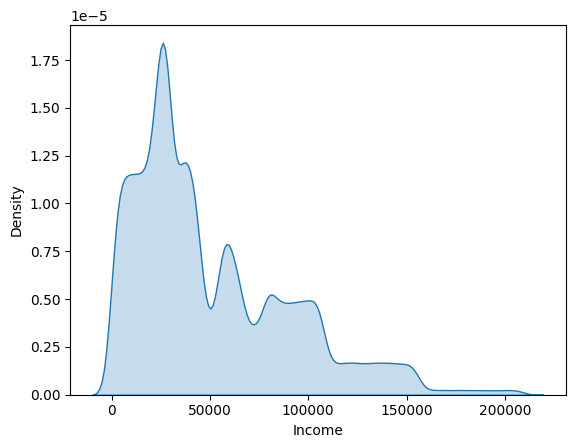

In [357]:
sns.kdeplot(df_cleaned['Income'], fill = True);

2. AGE : dengeli bir veri setimiz var, her yaştan hemen hemen ayni sayida kisiler mevcut

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


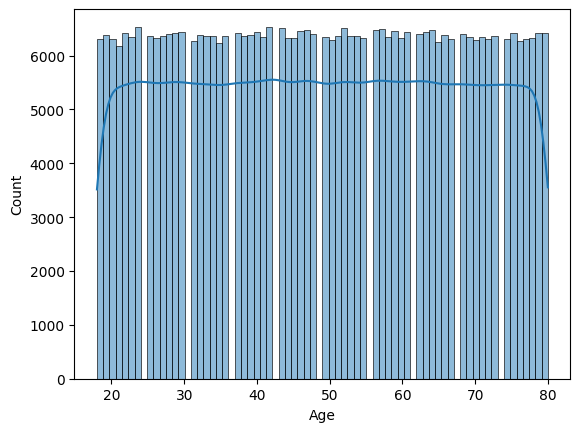

In [360]:
sns.histplot(data = df, x = "Age", kde = True);

3. NUMBER OF CHILDREN : cogu kisinin cocugu yok, cocugu olanlarin ise dengeli bir sekilde 1, 2, veya 3 cocugu var. 4 cocugu olan kisi sayisi daha az.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


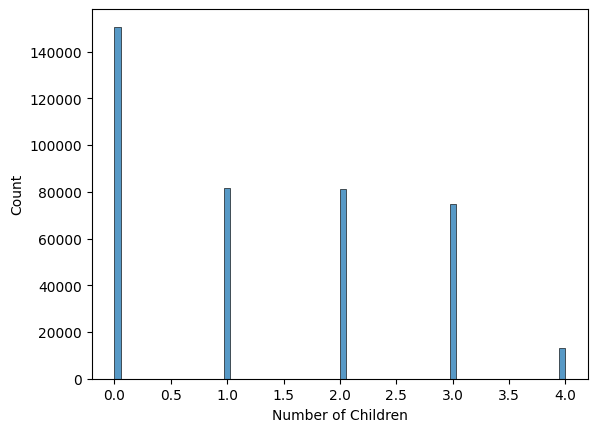

In [362]:
sns.histplot(data = df, x = "Number of Children");

Income degiskeninin farkli kategorik degiskenlerle olan iliskisini analiz edelim :

1. INCOME - HISTORY OF MENTAL ILLNESS ; gercekten, gecmiste mental bozukluk tanisi konulan kisilerin daha dusuk gelir elde ettiklerini gorebiliyoruz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

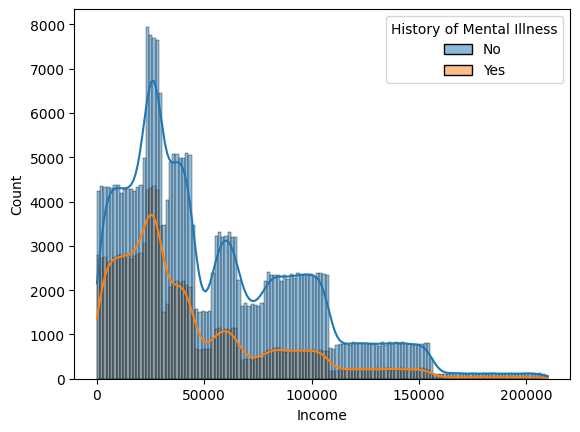

In [353]:
# Numerik bir kolonun dağılımını görmek için histogram kullanabiliriz.
sns.histplot(data = df, x = "Income", kde = True, hue = "History of Mental Illness");

2. INCOME - EMPLOYMENT STATUS ; bekledigimiz degerler gorebiliyoruz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

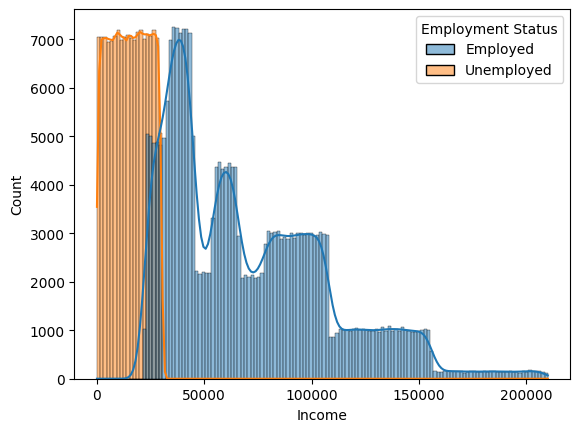

In [352]:
sns.histplot(data = df, x = "Income", kde = True,  hue = "Employment Status");

3. INCOME - HISTORY OF SUBSTANCE ABUSE ; belirli bir iliski goruntelenemiyor, madde kullanmis olanlarin da, olmayanlarin da hemen hemen ayni gelir elde ettiklerini gorebiliyoruz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


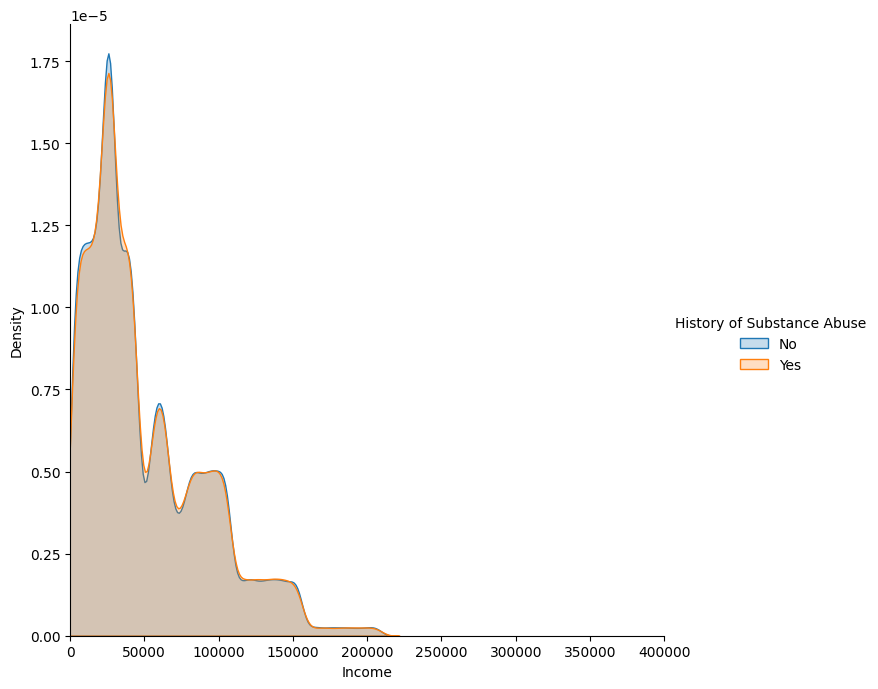

In [363]:
sns.FacetGrid(data = df,
              hue = "History of Substance Abuse",
              height = 7,
              xlim = (0, 400000)).map(sns.kdeplot, "Income", fill = True).add_legend();

4. INCOME - EDUCATION LEVEL : bekledigimiz gibi, egitim seviyesi ne kadar artarsa, gelir seviyeleri de o kadar artiyor.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


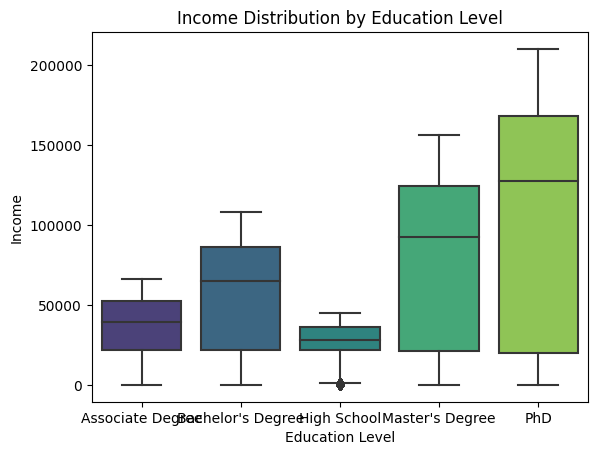

In [365]:
sns.boxplot(data=df_cleaned, x='Education Level', y='Income', palette='viridis')
plt.title('Income Distribution by Education Level')
plt.show()

Age range'e gore analizler  :

1. AGE RANGE - SMOKING STATUS ; cogu kisinin sigara icmedigini, senior age grubunda da genelde sigara icenler yok.

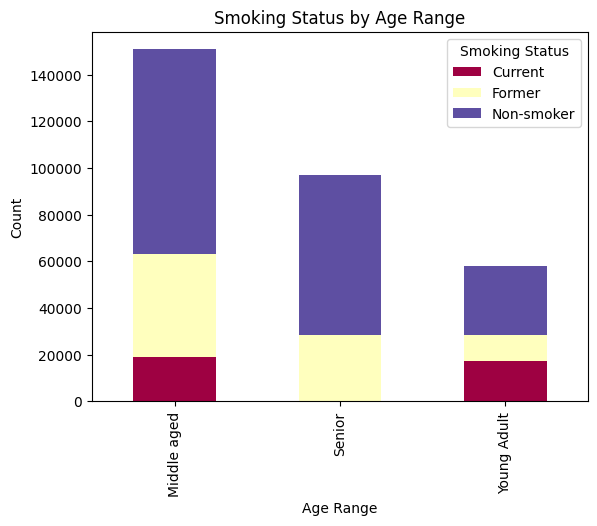

In [366]:
pd.crosstab(df_cleaned['Age Range'], df_cleaned['Smoking Status']).plot(kind='bar', stacked=True, colormap='Spectral')
plt.title('Smoking Status by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

2. AGE RANGE - MARITAL STATUS : aldigimiz degerler gercek dunya durumlari temsil ediyor

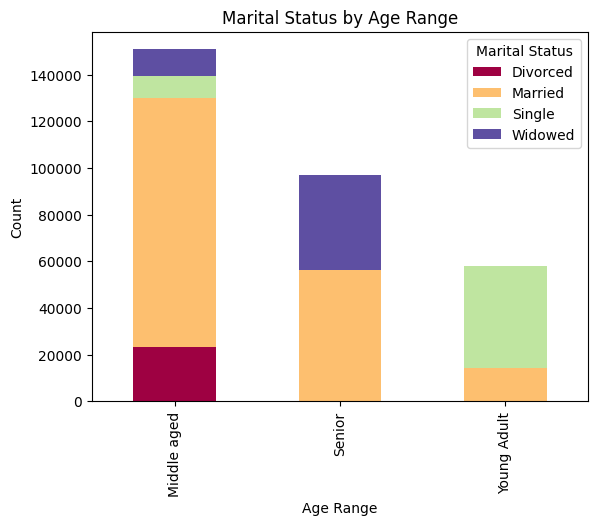

In [367]:
pd.crosstab(df_cleaned['Age Range'], df_cleaned['Marital Status']).plot(kind='bar', stacked=True, colormap='Spectral')
plt.title('Marital Status by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

3. AGE RANGE - Physical Activity Level ; genclerin cogu aktif bir yasam tarzi surdururken, malesef diger iki grupta cogu bireyin sedenter bir yasam tarzi var.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


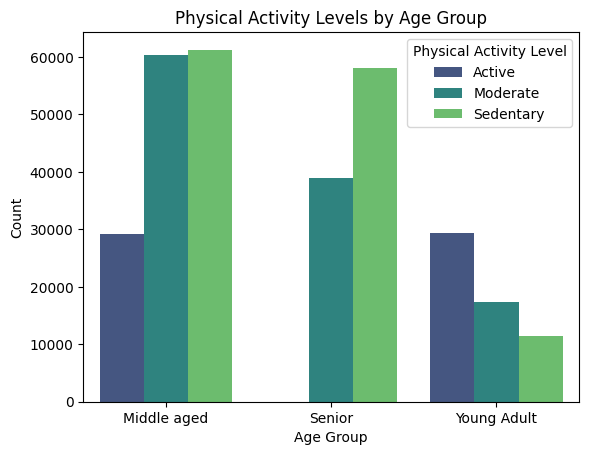

In [371]:
sns.countplot(data=df_cleaned, x='Age Range', hue='Physical Activity Level', palette='viridis')
plt.title('Physical Activity Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

4. AGE RANGE - CHRONICAL MEDICAL CONDITIONS : genelde her age grubu icin bireylerin yaklasik olarak %50sinin kronik hastaligi var. 

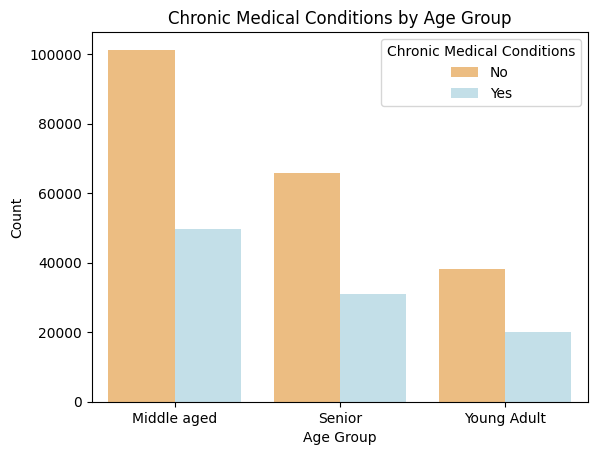

In [372]:
sns.countplot(data=df_cleaned, x='Age Range', hue='Chronic Medical Conditions', palette='RdYlBu')
plt.title('Chronic Medical Conditions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Number of children analizleri :

1. NUMBER OF CHILDREN - HISTORY OF MENTAL ILLNESS : ilginc olarak, bir mental bozuklugun bulunmasi veya bulunmamasi ile cocuk sayisi arasinda bir baglanti yok gibi gorunuyor.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


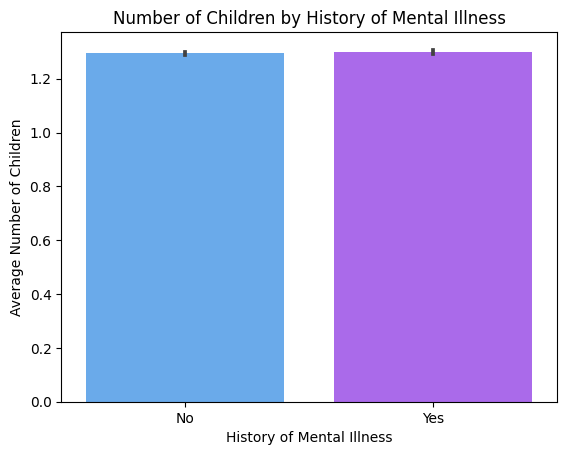

In [373]:
sns.barplot(data=df_cleaned, x='History of Mental Illness', y='Number of Children', palette='cool')
plt.title('Number of Children by History of Mental Illness')
plt.xlabel('History of Mental Illness')
plt.ylabel('Average Number of Children')
plt.show()


2. NUMBER OF CHILDREN - AGE RANGE - INCOME RANGE : cocuk sayisinin daha cok yas ile ilgili oldugunu, gelir seviyesi ile pek baglantili olmadigini gorebiliyoruz.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


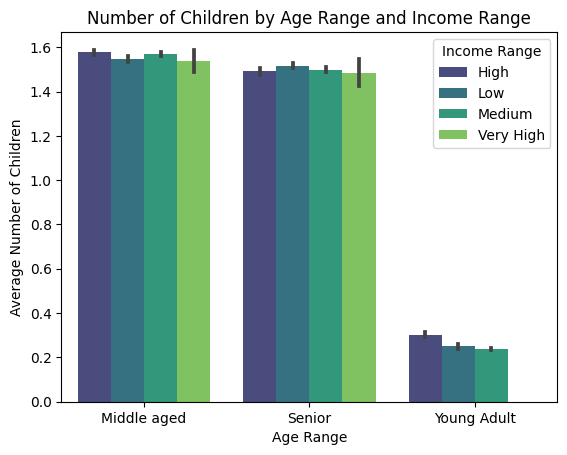

In [374]:
sns.barplot(data=df_cleaned, x='Age Range', y='Number of Children', hue='Income Range', palette='viridis')
plt.title('Number of Children by Age Range and Income Range')
plt.xlabel('Age Range')
plt.ylabel('Average Number of Children')
plt.legend(title='Income Range')
plt.show()

**b) Kategorik degisken dagilimlari ile aralarindaki baglantilari inceleyelim :**

1. ALCOHOL CONSUMPTION

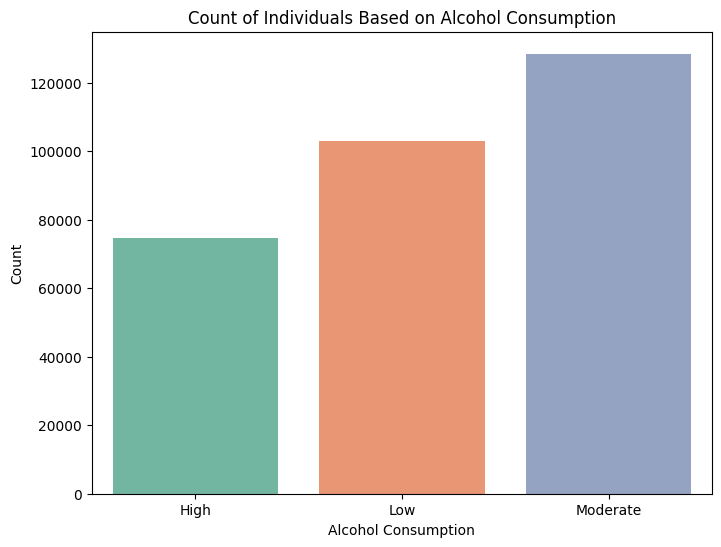

In [376]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Alcohol Consumption', data=df_cleaned, palette='Set2')

# Add labels and title
plt.title('Count of Individuals Based on Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.show()

2. HISTORY OF MENTAL HEALTH ILLNESS

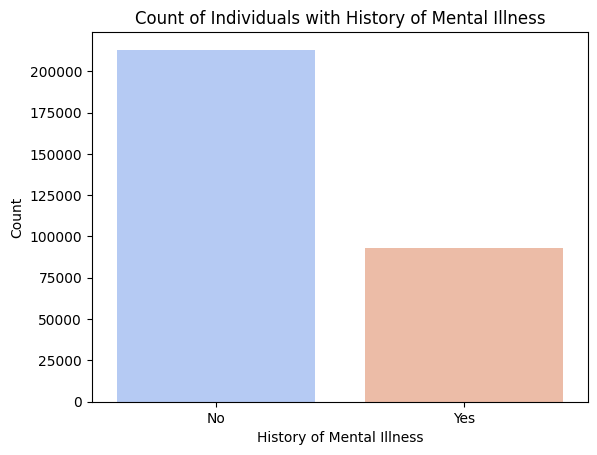

In [377]:
sns.countplot(data=df_cleaned, x='History of Mental Illness', palette='coolwarm')
plt.title('Count of Individuals with History of Mental Illness')
plt.xlabel('History of Mental Illness')
plt.ylabel('Count')
plt.show()

3. SLEEP PATTERNS

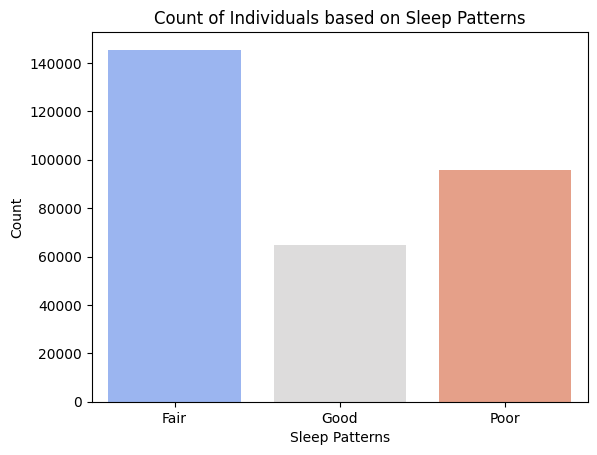

In [378]:
sns.countplot(data=df_cleaned, x='Sleep Patterns', palette='coolwarm')
plt.title('Count of Individuals based on Sleep Patterns')
plt.xlabel('Sleep Patterns')
plt.ylabel('Count')
plt.show()

4. DIETARY HABITS

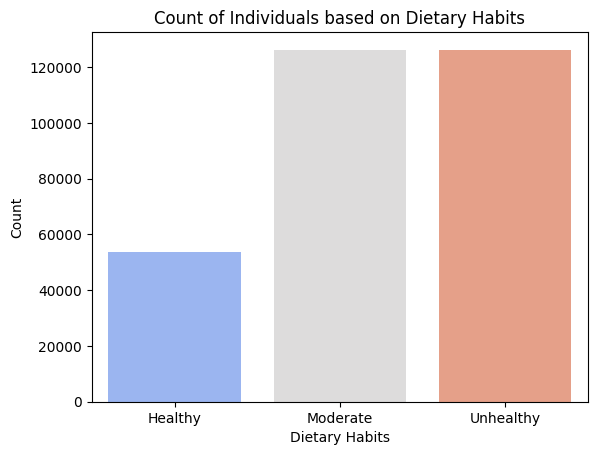

In [379]:
sns.countplot(data=df_cleaned, x='Dietary Habits', palette='coolwarm')
plt.title('Count of Individuals based on Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.show()

5. SLEEP PATTERNS - MENTAL ILLNESS HISTORY : belirli bir iliski gorunmuyor

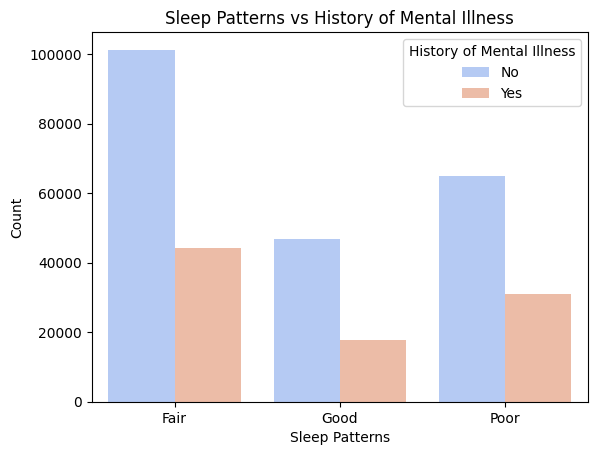

In [380]:
sns.countplot(data=df_cleaned, x='Sleep Patterns', hue='History of Mental Illness', palette='coolwarm')
plt.title('Sleep Patterns vs History of Mental Illness')
plt.xlabel('Sleep Patterns')
plt.ylabel('Count')
plt.legend(title='History of Mental Illness', labels=['No', 'Yes'])
plt.show()

6. SMOKING STATUS

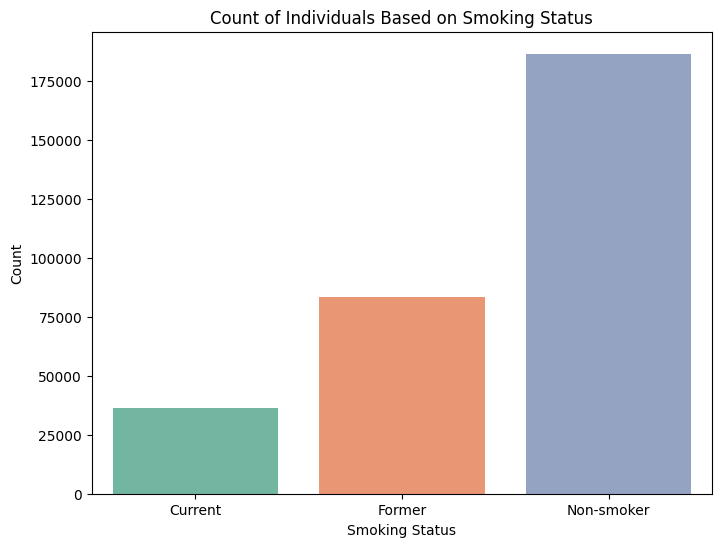

In [392]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking Status', data=df_cleaned, palette='Set2')

# Add labels and title
plt.title('Count of Individuals Based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

7. EMPLOYMENT STATUS - HISTORY OF MENTAL ILLNESS : calisan grubunda, calismayan grubuna gore hasta bireylerin orani daha dusuk. 

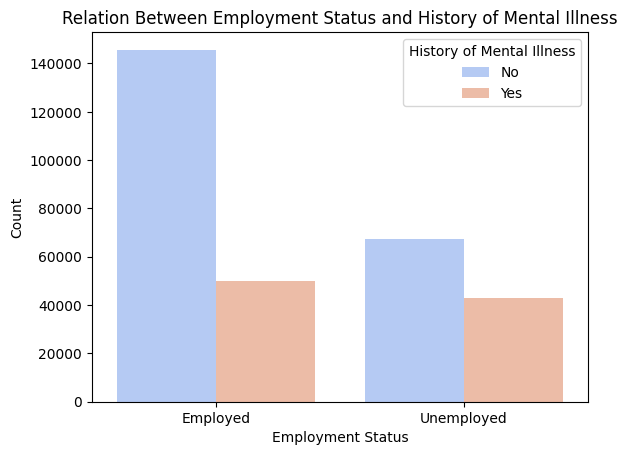

In [382]:
sns.countplot(
    data=df_cleaned,
    x="Employment Status",
    hue="History of Mental Illness",
    palette="coolwarm",
    order=["Employed", "Unemployed"]  # Ensure consistent order
)
plt.title("Relation Between Employment Status and History of Mental Illness")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.legend(title="History of Mental Illness")
plt.show()

8. SMOKING STATUS - ALCOHOL CONSUMPTION : halihazirda sigara icenler, alkon kullanimi acisindan da yuksek seviyeye cikmaya egilimli. 

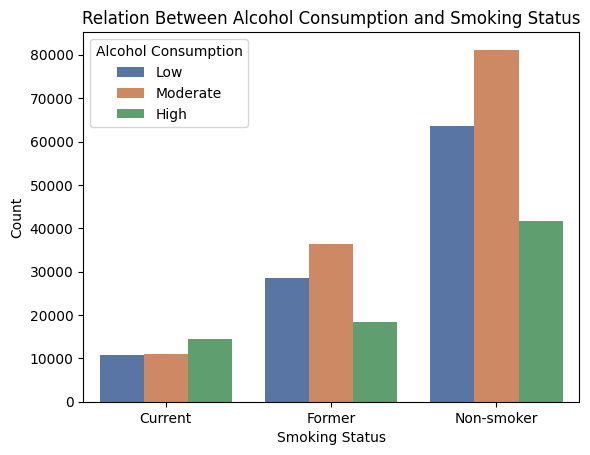

In [394]:
sns.countplot(
    data=df_cleaned,
    x="Smoking Status",          # X-axis: Alcohol Consumption categories
    hue="Alcohol Consumption",             # Color by Smoking Status (Smoker, Former, Non-smoker)
    palette="deep",               # Color palette
    hue_order=["Low", "Moderate", "High"],  # Order of Alcohol Consumption levels
    order=["Current", "Former", "Non-smoker"],  # Order of Smoking Status
)

plt.title("Relation Between Alcohol Consumption and Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Alcohol Consumption")
plt.show()

9. PHYSICAL ACTIVITY - EMPLOYMENT STATUS : guclu bir iliski yok ve malesef her iki grupta sedenter yasam tarzi zirvededir.

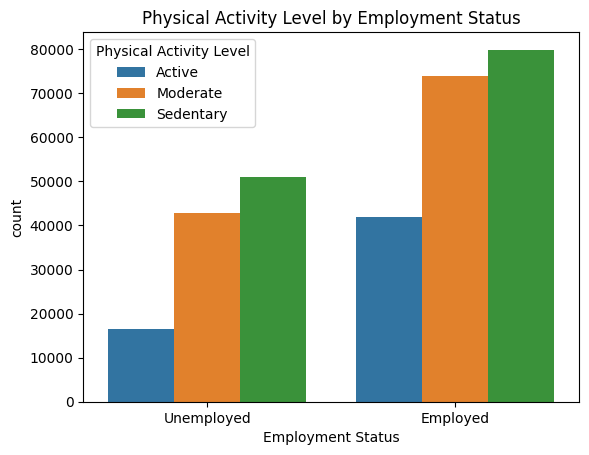

In [396]:
sns.countplot(data=df_cleaned, x="Employment Status", hue="Physical Activity Level")
plt.title("Physical Activity Level by Employment Status")
plt.show()

10. HISTORY OF MENTAL HEALTH ILLNESS - FAMILY HISTORY ; ailede depresyon gecmisi ile bireyde mental bozuklugunun bulunmasi cok baglantili degil gibi gorunuyor.

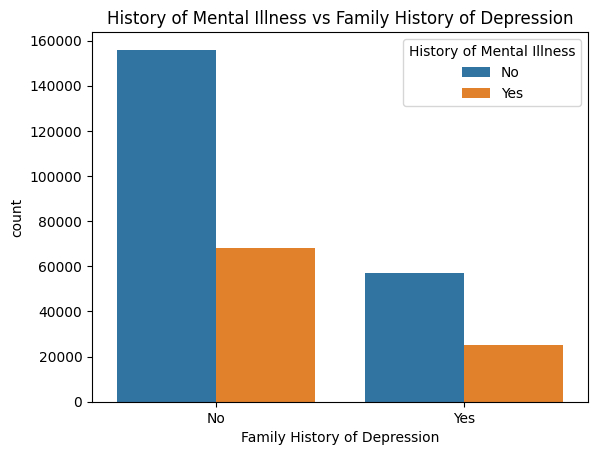

In [399]:
sns.countplot(data=df_cleaned, x="Family History of Depression", hue="History of Mental Illness")
plt.title("History of Mental Illness vs Family History of Depression")
plt.show()

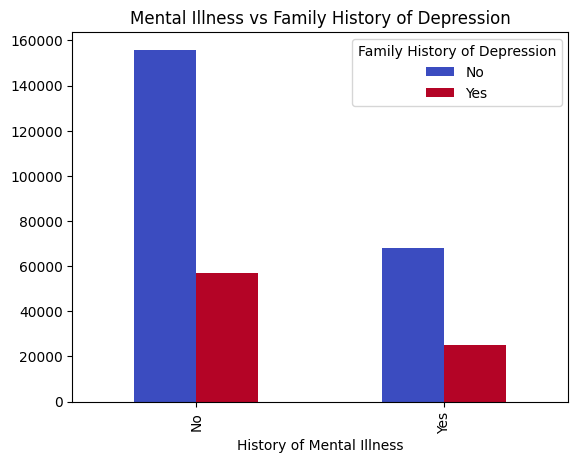

In [368]:
pd.crosstab(df_cleaned['History of Mental Illness'], df_cleaned['Family History of Depression']).plot(kind='bar', colormap='coolwarm')
plt.title('Mental Illness vs Family History of Depression')
plt.show()

Numerik degiskenler arasinda korelasyon matrisi hesaplayalim :

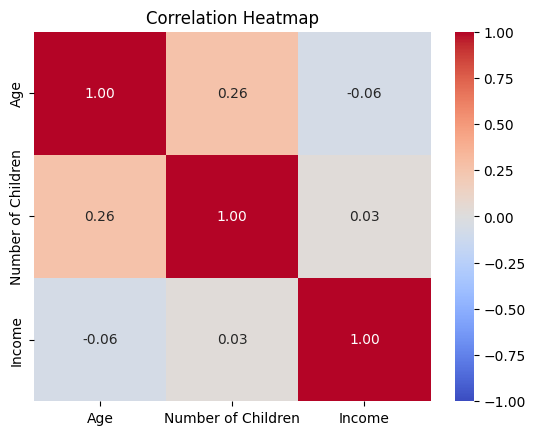

In [406]:

corr_matrix = df_numerical.corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title("Correlation Heatmap")
plt.show()


Cocuk sayisi ile yaş arasinda baglanti mevcuttur. Ama yaş ile gelir arasindaki ve cocuk sayisi ile gelir arasindaki iliskiler cok zayiftir. 

Gercekten,

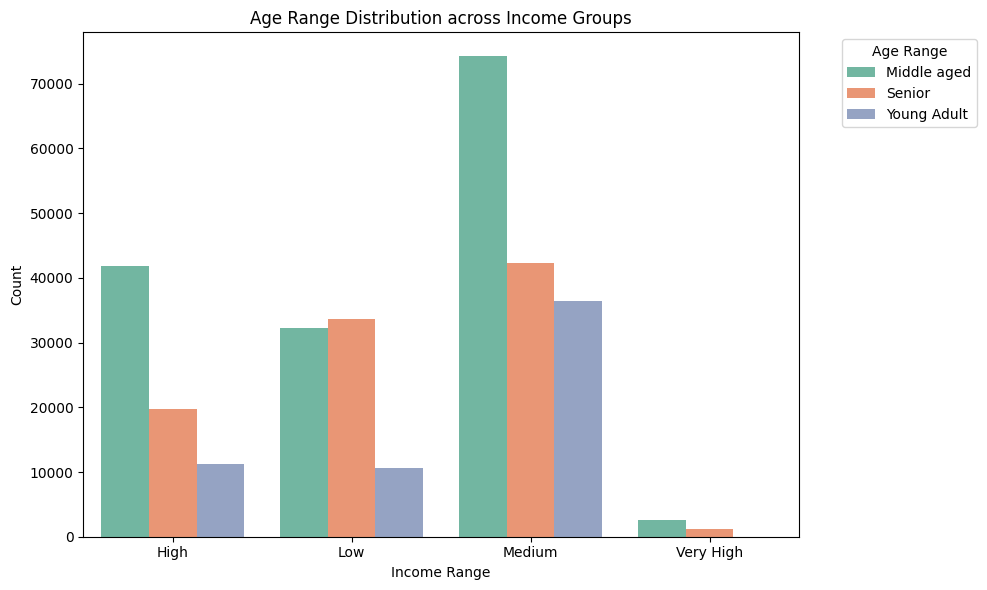

In [455]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Range', hue='Age Range', data=df_cleaned, palette='Set2')
plt.title('Age Range Distribution across Income Groups')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.legend(title='Age Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Simdi, veri setimizdeki tum degerler icin korelasyon matrisini hesaplayalim. Oncellikle, tum kategorik degerlerimizi sayisal degerlere donusturuyoruz.

In [445]:
df_converted = df_cleaned.copy()

# Mapping for Marital Status
df_converted['Marital Status'] = (df_cleaned['Marital Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2, 'Widowed': 3})).astype(int)

# Mapping for Education Level
df_converted['Education Level'] = (df_cleaned['Education Level'].map({'High School': 0, 'Associate Degree': 1, 'Bachelor\'s Degree': 2, 'Master\'s Degree': 3, 'PhD': 4})).astype(int)

# Mapping for Smoking Status
df_converted['Smoking Status'] = (df_cleaned['Smoking Status'].map({'Current': 1, 'Former': 2, 'Non-smoker': 3})).astype(int)

# Mapping for Physical Activity Level
df_converted['Physical Activity Level'] = (df_cleaned['Physical Activity Level'].map({'Sedentary': 0, 'Moderate': 1, 'Active': 2})).astype(int)

# Mapping for Employment Status
df_converted['Employment Status'] = (df_cleaned['Employment Status'].map({'Employed': 1, 'Unemployed': 0})).astype(int)

# Mapping for Alcohol Consumption
df_converted['Alcohol Consumption'] = (df_cleaned['Alcohol Consumption'].map({'Low': 1, 'Moderate': 2, 'High': 3})).astype(int)

# Mapping for Dietary Habits
df_converted['Dietary Habits'] = (df_cleaned['Dietary Habits'].map({'Healthy': 1, 'Moderate': 2, 'Unhealthy': 3})).astype(int)

# Mapping for Sleep Patterns
df_converted['Sleep Patterns'] = (df_cleaned['Sleep Patterns'].map({'Good': 1, 'Fair': 2, 'Poor': 3})).astype(int)

# Mapping for History of Mental Illness
df_converted['History of Mental Illness'] = (df_cleaned['History of Mental Illness'].map({'No': 0, 'Yes': 1})).astype(int)

# Mapping for History of Substance Abuse
df_converted['History of Substance Abuse'] = (df_cleaned['History of Substance Abuse'].map({'No': 0, 'Yes': 1})).astype(int)

# Mapping for Family History of Depression
df_converted['Family History of Depression'] = (df_cleaned['Family History of Depression'].map({'No': 0, 'Yes': 1})).astype(int)

# Mapping for Chronic Medical Conditions
df_converted['Chronic Medical Conditions'] = (df_cleaned['Chronic Medical Conditions'].map({'No': 0, 'Yes': 1})).astype(int)

# Retaining numerical features as they are
df_converted['Age'] = df_cleaned['Age']
df_converted['Income'] = df_cleaned['Income']
df_converted['Number of Children'] = df_cleaned['Number of Children']

df_converted = df_converted.drop(columns=['Age Range', 'Income Range'])

df_converted.head()


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31.0,1,2,2.0,3,2,0,26265.67,2,2,2,1,0,1,1
1,55.0,1,0,1.0,3,0,1,42710.36,3,3,2,1,0,0,1
2,78.0,3,3,1.0,3,0,1,125332.79,1,3,1,0,0,1,0
4,18.0,0,0,0.0,3,0,0,8595.08,1,2,2,1,0,1,1
5,20.0,0,0,0.0,2,2,1,44448.91,1,3,2,0,1,0,0


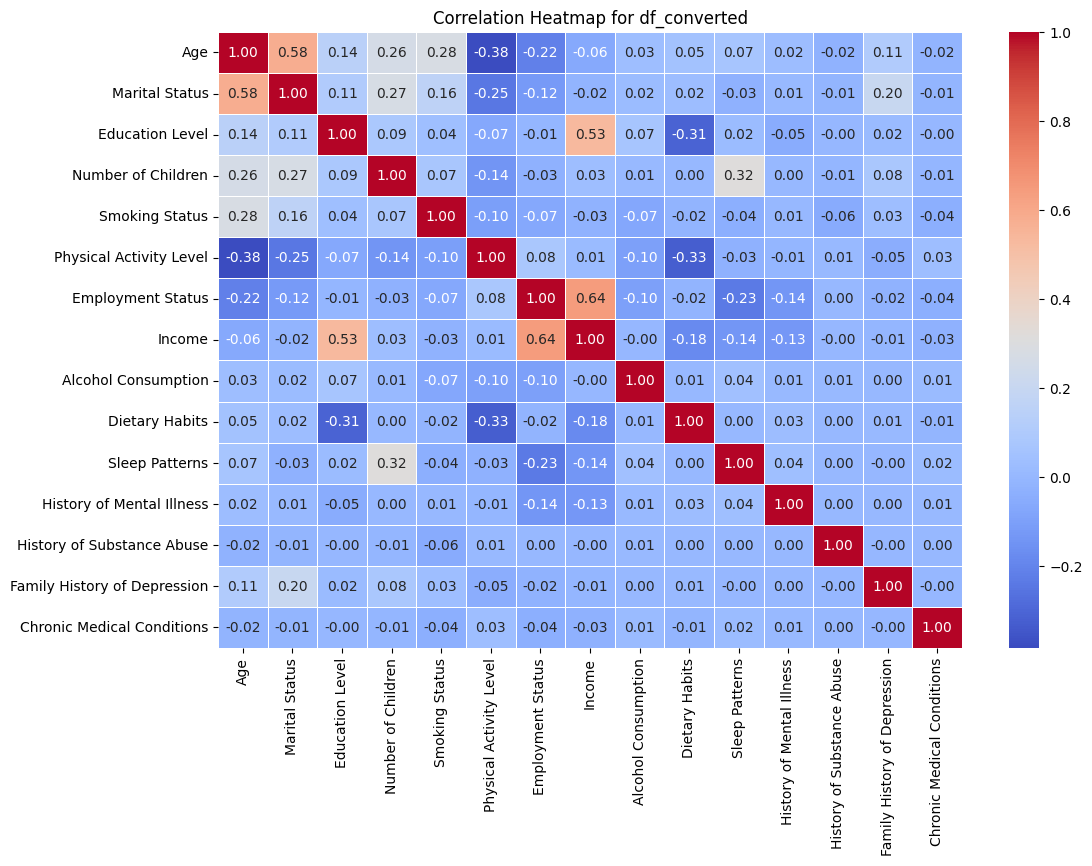

In [446]:
correlation_matrix = df_converted.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title("Correlation Heatmap for df_converted")
plt.show()

Uyari : Korelasyon matrisi, veri gorsellestirmelerinden once gosterilebilecegi gibi, sonrasinda da gosterilebilir.

Gorundugu uzere, History of Substance Abuse cok onemli bir degisken degil, bu yuzden Feature Selection kapsaminda onu silebiliriz. Bunu yapmamizin amaclari, ilerde bir ML modelinin 
performansını artırmaya yardımcı olacak gereksiz bilgiyi azaltmak, hesaplama maliyetlerini 
düşürmek, veri boyutunu azaltarak overfitting riskini önlemtik,

In [449]:
df_cleaned = df_cleaned.drop(columns=["History of Substance Abuse"])

df_cleaned.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,Family History of Depression,Chronic Medical Conditions,Age Range,Income Range
0,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,Yes,Yes,Middle aged,Medium
1,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,Yes,Middle aged,Medium
2,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,Yes,No,Senior,High
4,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,Yes,Yes,Young Adult,Low
5,20.0,Single,High School,0.0,Former,Active,Employed,44448.91,Low,Unhealthy,Fair,No,No,No,Young Adult,Medium


Elde ettiğimiz analizler, bireylerin demografik, sağlık ve yaşam tarzı özellikleri ile ilişkili sağlık durumlarını anlamak için değerli bilgiler sunuyor. Bu veri seti, özellikle sağlık ve yaşam tarzı faktörlerinin, kişilerin fiziksel ve zihinsel sağlık durumlarına etkisini değerlendirmede faydalı. Örneğin, depresyon geçmişi, fiziksel aktivite düzeyi, beslenme alışkanlıkları ve uyku düzeni gibi faktörler, bireylerin yaşam kalitesini ve sağlıklarını doğrudan etkileyen parametrelerdir.